In [1]:
from google.colab import files
uploaded = files.upload()


Saving images.zip to images.zip


In [2]:
import zipfile
import os

with zipfile.ZipFile("images.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/images")


os.listdir("/content/images/archive (1)")


['potholes', 'normal']

In [3]:
import cv2
import numpy as np
import os

data = []
labels = []


base_path = '/content/images/archive (1)'

for category in ['normal', 'potholes']:
    folder = os.path.join(base_path, category)
    label = 0 if category == 'normal' else 1

    for file in os.listdir(folder):
        img_path = os.path.join(folder, file)
        try:
            img = cv2.imread(img_path)
            img = cv2.resize(img, (128, 128))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            data.append(img.flatten())
            labels.append(label)
        except:
            pass

X = np.array(data)
y = np.array(labels)

print("Dataset loaded successfully!")
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Dataset loaded successfully!
Shape of X: (681, 16384)
Shape of y: (681,)


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(  X, y, test_size=0.2, random_state=42, stratify=y)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 544
Testing samples: 137


In [5]:
# SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_model = SVC(kernel='rbf', C=1, gamma='scale')
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)
svm_acc = accuracy_score(y_test, y_pred_svm)

print(" SVM Accuracy:", round(svm_acc * 100, 2), "%")


 SVM Accuracy: 73.72 %


In [6]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)

print(" Random Forest Accuracy:", round(rf_acc * 100, 2), "%")


 Random Forest Accuracy: 75.91 %


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.66      0.72        71
           1       0.69      0.82      0.75        66

    accuracy                           0.74       137
   macro avg       0.74      0.74      0.74       137
weighted avg       0.75      0.74      0.74       137


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.82      0.78        71
           1       0.78      0.70      0.74        66

    accuracy                           0.76       137
   macro avg       0.76      0.76      0.76       137
weighted avg       0.76      0.76      0.76       137



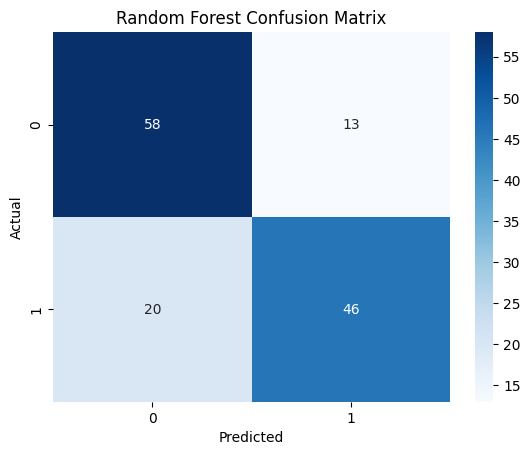

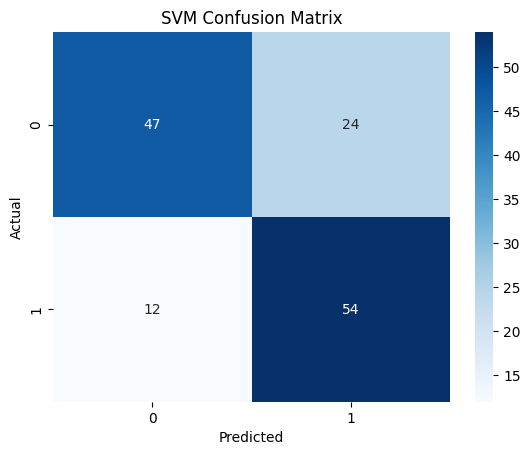

In [9]:
#Evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [10]:
# Model Testing
def predict_image(path, model):
    img = cv2.imread(path)
    img = cv2.resize(img, (128, 128))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    f = img.flatten().reshape(1, -1)
    pred = model.predict(f)
    return "Pothole" if pred[0] == 1 else "Normal Road"

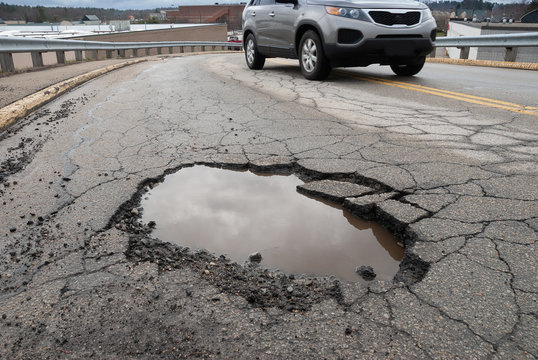

Pothole


In [11]:
import cv2
from google.colab.patches import cv2_imshow

test_image_path = '/content/Pathole.jpg'
test_image=cv2.imread(test_image_path)
cv2_imshow(test_image)
print(predict_image(test_image_path, rf_model))

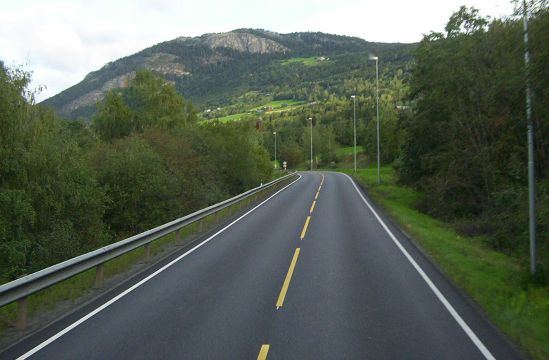

Normal Road


In [12]:
import cv2
from google.colab.patches import cv2_imshow
test_image_path = '/content/Normal.jpg'
test_image=cv2.imread(test_image_path)
cv2_imshow(test_image)
print(predict_image(test_image_path, rf_model))